In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


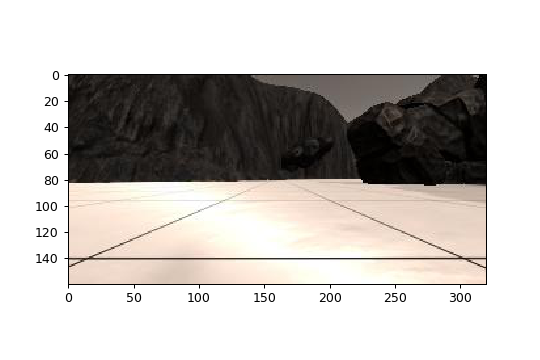

In [3]:
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)
plt.show()

In [4]:
import cv2
import numpy as np

In [14]:
print(image.dtype,image.shape)

uint8 (160, 320, 3)


In [5]:
def perspect_transform(img,src,dst):
    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped

In [9]:
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6

source = np.float32([[ 14,140 ], [301 ,140 ], [200 ,96 ], [118 ,96 ]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])


In [29]:
#image.shape[1]/2 - dst_size = 155.0
#image.shape[0] - bottom_offset = 154.0 (155,154)
#image.shape[1]/2 + dst_size = 165.0
#image.shape[0] - bottom_offset = 154 (165,154)
#image.shape[1]/2 + dst_size = 165
#image.shape[0] - 2*dst_size - bottom_offset = (165,144)
#image.shape[1]/2 - dst_size = 155
#image.shape[0] - 2*dst_size - bottom_offset = 144 (155,144)

144

In [20]:
warped=perspect_transform(image, source, destination)

<IPython.core.display.Javascript object>


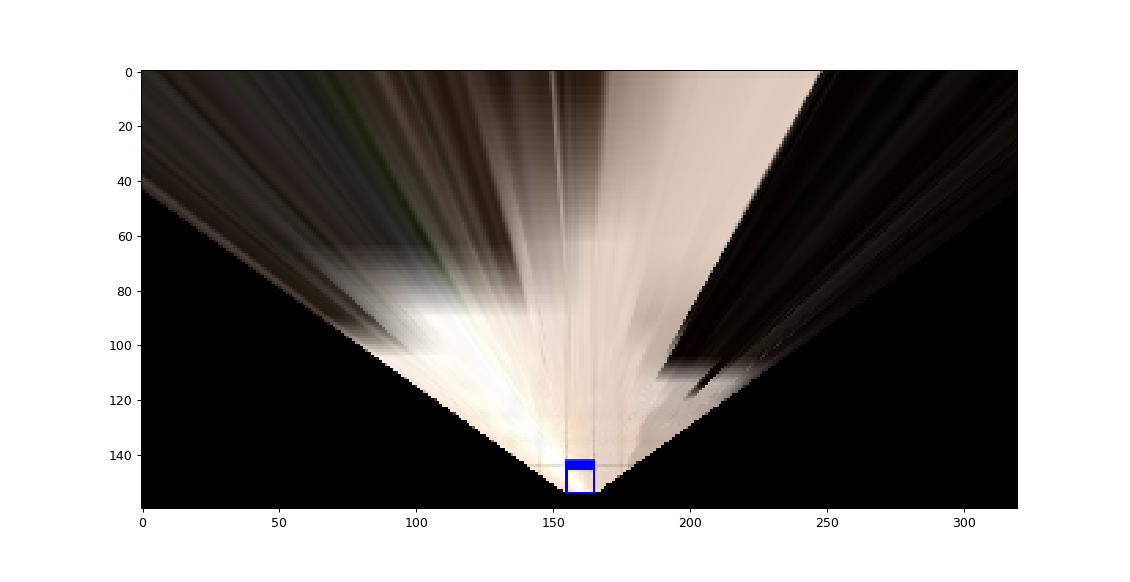

In [22]:
plt.imshow(warped)
plt.show()

<IPython.core.display.Javascript object>


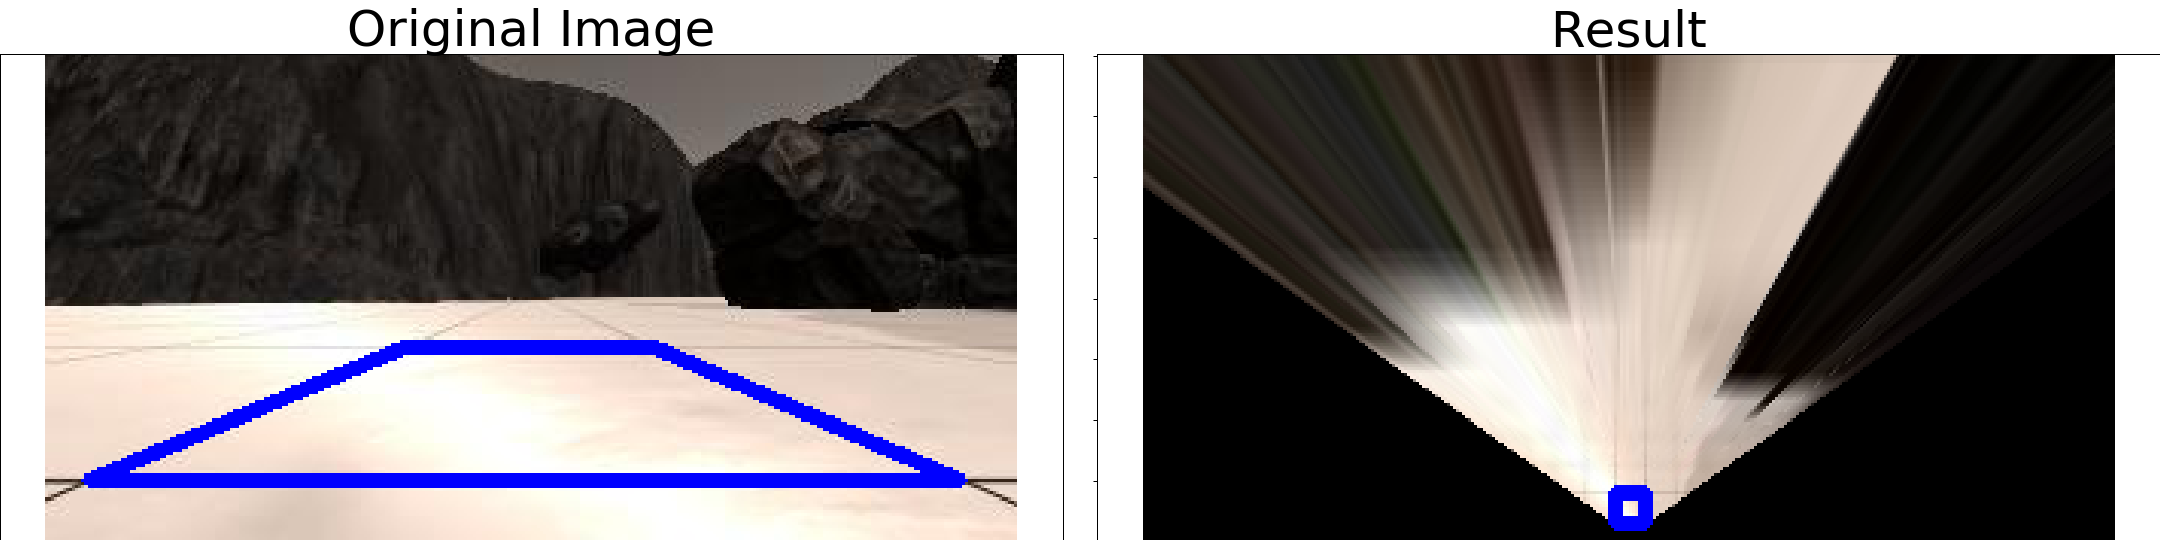

In [30]:
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()